In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Your First Differential Equation

So, we are going to start with the classic compound interest problem.  Starting with principal $P_{0}$, we have the following interest model 

$$
P_{n} = P_{n-1} + r\Delta t P_{n-1}, ~ n\geq 1
$$

in which 

 * $P_{n}$ = Amoung of cash at $n^{th}$ time step.

 * $r$ = rate of return 

 * $\Delta t$ = interval of time between computing interest 
 
The above equation for $P_{n}$ is known as a _difference equation_.  Difference equations and differential equations are intimately related as we are about to show.  

### From Discrete Solution to a Continuous Solution

**Problem 1**: Using induction, show that $P_{n}=(1+r\Delta t)^{n}P_{0}$ solves the above difference equation.  

*Solution*: Base case: $n=1$ so that 
\begin{align*}
P_{1}=& P_{0}+r\Delta t P_{0} \\
=&(1+r\Delta t)P_{0}
\end{align*}
Then, starting from 
$$
P_{n+1} = (1+r\Delta t)P_{n}
$$
and using the inductive hypothesis $P_{n}=(1+r\Delta t)^{n}P_{0}$, we then have 
$$
P_{n+1} = (1+r\Delta t)P_{n} = (1+r\Delta t)(1+r\Delta t)^{n}P_{0} = (1+r\Delta t)^{n+1}P_{0}
$$
and that completes the proof (last bit of induction for a long long while, so don't worry if this isn't crystal clear).

**Problem 2**: Using the identity $x = e^{\ln(x)}$ and the fact that $\ln(x^{n}) = n\ln(x)$ show that 

$$
P_{n} = e^{n\ln(1+r\Delta t)}P_{0}
$$

*Solution*: So if
$$
P_{n} = (1+r\Delta t)^{n}P_{0}
$$
then we have, using the above identities, that 
$$
P_{n}=(1+r\Delta t)^{n}P_{0} = e^{\ln((1+r\Delta t)^{n})}P_{0} = e^{n\ln(1+r\Delta t)}P_{0}
$$

Okay, well that looks messy, but useful for keeping track of your bank account.  

Now as to that mess.  Like good applied mathematicians, we know that whenever we are confronted with mess, we handle that business through approximation.  To wit, we suppose that $\Delta t$ is small, so that we are making a modeling assumption in which we suppose that the interest is compounded frequently.  

> Note: Throughout the course you will see me abbreviate the statement "$\Delta t$ is small" as $\Delta t \ll 1$.  

So, supposing $\delta t \ll 1$, we might think about using a Taylor series.  The relevant one here is 

$$
\ln(1+x) = x - \frac{x^{2}}{2} + \frac{x^{3}}{3} + \mathcal{O}(x^{4})
$$

Now, what's that $\mathcal{O}(x^{4})$ all about?  Well the full expression for the above Taylor series is 

$$
\ln(1+x) = x - \frac{x^{2}}{2} + \frac{x^{3}}{3} + \sum_{n=4}^{\infty}(-1)^{n+1}\frac{x^{n}}{n}
$$

so everything in the $\mathcal{O}(x^{4})$ term means all those powers of $x$ equal to or greater than 4.  And keep in mind, we want to use these formula when $|x|\ll 1$, so if that's true, then every higher power of $x$ gets smaller and smaller. That all said, we could even be really daring and just use 

$$
\ln(1+x) = x + \mathcal{O}(x^{2}).
$$

**Problem 3**: Using $\ln(1+x) = x + \mathcal{O}(x^{2})$, provide a brief argument for why 

$$
P_{n} \approx e^{rn\Delta t}P_{0}
$$

is a good approximation if $\Delta t \ll 1$.

*Solution*: 
$$
P_{n} = e^{n\ln(1+r\Delta t)}P_{0} \approx e^{n(r\Delta t + \mathcal{O}(r^{2}(\Delta t)^{2}))} P_{0} \approx e^{n(r\Delta t )} P_{0} = e^{r(n \Delta t )} P_{0}
$$

Now the next step is a little weird.  I could make this more technical, but I don't want to get too bogged down in the details.  What we're going to do is say that 

$$
P_{n}=P(n\Delta t),
$$

so that there is some function $P(t)$ equal to $P_{n}$ when $t=n\Delta t$.  Note, this implies that 

$$P(0)=P_{0}.$$  

I am then going to say that as $\Delta t\rightarrow 0$, our approximation becomes  

$$
P(t) = e^{rt}P_{0}.
$$

Thus, if interest is compounded continuously, we get that our investment will follow the behavior of the above function.  



### From Difference Equation to Differential Equation

Okay, so where are we going here?  Well, let's go back to the difference equation, but rewrite it slightly so that 

$$
\frac{P_{n}-P_{n-1}}{\Delta t} = r P_{n-1}.
$$

That left-hand side should feel a lot like a derivative.  Let's see why that is.  Using our $P_{n}=P(n\delta t)$ formula, if we follow the logic forward then we have 

\begin{align*}
P_{n-1} = & P((n-1)\Delta t)\\
= & P(n\Delta t - \Delta t)\\
= & P(n\Delta t) - P'(n\Delta t) \Delta t + \mathcal{O}((\Delta t)^{2})\\
\end{align*}

Look at us using Taylor Series like barbarians!  Also, this should be the trickiest thing we ever do with a Taylor series throughout the course.  So try to remember this is here, especially when we talk about numerics later.  

**Problem 4**: Using the above, show that the difference equation can be written as 

$$
P'(n\Delta t) + \mathcal{O}(\Delta t) = rP(n\Delta t) + \mathcal{O}(\Delta t).
$$

Note, use $\mathcal{O}((\Delta t)^{2})/\Delta t = \mathcal{O}(\Delta t)$.

From this, letting $\Delta t \rightarrow 0$, find the differential equation 

$$
\frac{dP}{dt} = rP, ~ P(0) = P_{0}
$$

*Solution*: So if we use the formula for $P_{n-1}$ we find that 

\begin{align*}
\frac{P_{n}-P_{n-1}}{\Delta t} = & \frac{P'(n\Delta t)\Delta t + \mathcal{O}((\Delta t)^{2})}{\Delta t} \\
= & P'(n\Delta t) + \mathcal{O}(\Delta t)
\end{align*}

Likewise, we have that $rP_{n-1} = rP(n\Delta t) + \mathcal{O}(\Delta t)$, and so we see 

$$
P'(n\Delta t) + \mathcal{O}(\Delta t) = rP(n\Delta t) + \mathcal{O}(\Delta t)
$$

Letting $\Delta t \rightarrow 0$ (and $n\rightarrow \infty$ so that $n\Delta t \rightarrow t$) we then get 

$$
\frac{dP}{dt} = rP, ~ P(0) = P_{0}
$$

And now we have your first differential equation.  It is *1st order* because it only involves a first derivative.  It has an *initial condition* $P(0)=P_{0}$.  To wit:

**Problem 5**: Show that $P(t) = e^{rt}P_{0}$ solves our differential equation for the given initial condition.  

*Solution*: We have
$$
\frac{d}{dt}\left(e^{rt}P_{0}\right) = re^{rt}P_{0} = rP(t).
$$
And noting that $P(0)=e^{r0}P_{0}=P_{0}$, that's that.  

So what have we shown in all of this?
* Difference equations with small steps pass to differential equations. 
* The solution of the difference equation passes to that of the differential equation.  
* Differential equations are easier to work with than difference equations.  

## Quick Solution Method

We'll talk about this more, but there is no reason we can't quickly see how to solve our differential equation model.  To do this, we perform the following separation of variables:

$$
\frac{dP}{dt} = rP \rightarrow \frac{dP}{P} = rdt
$$

I now integrate both sides so that 

$$
\int \frac{dP}{P} = r\int dt
$$

and thus we find that 

$$
\ln|P| = rt + C
$$

so that  

$$
P(t) = e^{C+rt} = e^{C}e^{rt}.  
$$

Now that $e^{C}$ is a little annoying since it's $e$ raised to an arbitrary constant, which just makes it an arbitrary constant.  So we replace it with $P(t)=\tilde{C}e^{rt}$.  To find the initial condition, we see that 

$$
P(0) = \tilde{C} = P_{0},
$$

and thus we find the solution 

$$
P(t) = P_{0}e^{rt}.
$$

**Problem 6**: Suppose we continuously deposit an amount of money $k$ while compounding interest on a principal investment $P_{0}$.  We can then model our investment in time via the differential equation 

$$
\frac{dP}{dt} = rP + k, ~ P(0)=P_{0}
$$

Find the solution $P(t)$ to this differential equation.  

*Solution* - So, I think it is a little easier to use a little trick first before we start shuffling terms across the equal sign.  My trick is to just factor a little bit.  Watch:

$$
\frac{dP}{dt} = rP + k = r\left(P + \frac{k}{r} \right).
$$

So now, when I shuffle, I get 

$$
\frac{dP}{P + \frac{k}{r}} = rdt.
$$

Note, my bit of factoring left me with an integral on right-hand side that is easier to take since I don't need to use any tricky usubs to find the integral.  

Integrate and do a little bit of constant collapsing and we find 

$$
P(t) + \frac{k}{r} = \tilde{C}e^{rt}
$$

or 

$$
P(t) = \tilde{C}e^{rt} - \frac{k}{r}.
$$

If we then apply our initial condition, we find that 

$$
P(0) = \tilde{C} - \frac{k}{r} = P_{0}
$$

so that 

$$
\tilde{C} = P_{0} + \frac{k}{r}
$$

and therefore we find the solution

$$
P(t) = \left(P_{0} + \frac{k}{r} \right)e^{rt} - \frac{k}{r}.
$$

Okay, so now suppose you're thirty years old.  You have access to a retirement account which gives an annual 3% return.  You start with a 1000 dollar investment.  Compare the difference in net investment between depositing 100 a month into your account and 200 a month into your account when you're sixty five.   

So, that's $P_{0}=1000$, $r = .03$, and if we stick to working in years, we have $k=1200$ or $k=2400$.  From here, let me use just a dash of Python to make some figures.  

Text(0.5, 0, 'Time(years)')

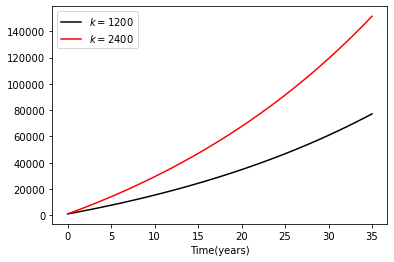

In [7]:
P0 = 1000.
k1 = 1200.
k2 = 2400.
r = .03
p1 = lambda t: (P0+k1/r)*np.exp(r*t) - k1/r
p2 = lambda t: (P0+k2/r)*np.exp(r*t) - k2/r
tvals = np.linspace(0, 35, 36)
plt.plot(tvals, p1(tvals), color='k', label='$k=1200$')
plt.plot(tvals, p2(tvals), color='r', label='$k=2400$')
plt.legend()
plt.xlabel("Time(years)")

So no big surprises there.  Now of course, someone is probably thinking... but if we only compounded interest annually... but we're using a continuous model... hmmm... something seems a little sus here.  So of course, we could have worked with the equivalent discrete-time model

$$
P_{n} = (1+r\Delta t)P_{n-1} + k\Delta t, ~ n\geq 1.
$$ 

and... it's hard (thus why I just give you the answer in the GroupWork).  So often, solving differential equations is markedly easier than solving difference equations, even though difference equations make more sense.  Now, in this example, we should also ask, exactly what is $\delta t$?  Now let's say we still use $k=1200/yr$ or $k=2400/yr$.  Okay, so $\delta t=1  yr$... which is not exactly small.  Or is it?  Well keep in mind, you're interested in looking at what happens over a 35 year long span of time.  So, using the exact solution to this problem from the GroupWork we find 

$$
P_{n} = (1+r\Delta t)^{n}\left(P_{0} + \frac{k}{r} \right) - \frac{k}{r}
$$

Let's compare for $k=1200/yr$ the difference in our continuous and discrete approximations.

Text(0.5, 0, 'Time(years)')

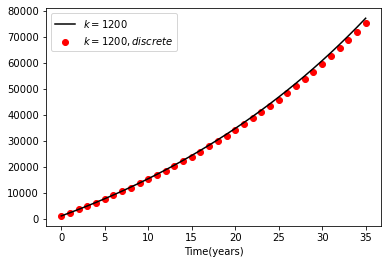

In [10]:
pd = lambda n: (P0+k1/r)*(1.+r)**n - k1/r
plt.plot(tvals, p1(tvals), color='k', label='$k=1200$')
plt.scatter(tvals, pd(tvals), color='r', label='$k=1200, discrete$')
plt.legend()
plt.xlabel("Time(years)")

So while not exact, clearly we don't lose too much in using the continuous, differential-equation based approximation.  And we get something that is far easier to work with using the tools of Calculus.  So... I'd call that worth the minor error in approximation.  